# MGT 595 Problem Set 7 
# Author: Denglin Wu, Adrienne Larson, Joanna Chen

In this problem set you will look at another potential source of risk / explanation of excess returns: Quality.  

In order to proceed you need Microsoft Excel Problem_Set7.xls in the folder. These files contain spreadsheets:  

1) monthly returns of 49 value-weighted industry portfolios; 
2) monthly returns of the Fama and French portfolios RMRF, SMB, HML, UMD, CMA, RMW, and rf; 
3) monthly returns of a betting-against-beta factor BAB, quality minus junk factor   QMJ


# Part I:  Conceptual:

1.	What is quality?  How is it defined? Do you think it should have an effect on asset expected returns?  It this obvious, or is it surprising?

2.	How is quality measured?  Is there an obvious way in which it should be measured?


3.	Compare and contrast the quality measurements used by
a.	Robert Novy-Marx (The Other side of Value)
b.	Frazzini and Pedersen (Betting Against Beta)
c.	Asness, Frazzini, Pedersen (Quality Minus Junk)
d.	Fama, French (A five-factor asset pricing model)
How do each measure the idea of “quality”?  Which measure do you find more reasonable and which not?  Why should any of these measures predict returns?  Is your explanation consistent or inconsistent with an efficient market?




1. Quality could take on multiple definitions with different investors, but in general it represents something "you are willing to pay a high price for, all else equal". Some definitions of quality includes:

  *   Profitabile
  *   Safe
  *   Good Governance
  *   Good Growth (could be in terms of asset, earning, etc.)
  *   High Payout
  *   Creditworthy
  *   Well-managed
  *   Stability

  Quality should have an effect on asset expected return. For example, investor should pay a price for the safety of an asset, e.g. lower expected return. On the other hand, a profitable asset might have a positive effect on expected return. In that sense, it is not obvious what such "price" should be, i.e. in which direction and in what magnitude.

2. Quality can be measured by profitability, investors' willingness to pay, and a stock's beta or riskiness. In general, investors are willing to pay more for stocks with higher profitability, growth and payout prospects, and a lower perceived level of risk, or beta. Lower beta stocks are less risky and are more likely to be quality stocks. 

3. 
 **a. Robert Novy-Marx (The Other side of Value):** 

 **Measuring quality:**
 
 Gross profitability= (revenues-COGS)/ assets
 Novy-Marx uses gross profitability to measure quality
 
 Gross profits/ assets= sales/assets x gross profits/ sales
 
 Novy-Marx compared firms with high profits to firms with low profits and found that firms generating more profit earned higher returns for investors than firms generating low profits. He also found that gross profitability is a strong predictor of returns. 

 **Rationale for predicting returns:** 
   
 Gross-profits-to-assets strongly predicts returns, especially controlling for book-to-market. Profitable firms have higher average returns than unprofitable firms.

 When analyzing how much of expected returns can be explained by value, momentum, and profitability, profitability proved to be a significant driver of returns.  

 Gross profitability, as a measure of quality, is a strong predictor of the cross-section of average returns. 

 **b. Frazzini and Pedersen (Betting Against Beta):** 

 **Measuring quality:**

  Low beta stocks are a good predictor for quality, as both quality and low beta stocks tend to have low risk. Quality is therefore inversely correlated with beta: lower beta stocks can be a measure of higher quality assets. 

   **Rationale for predicting returns:**

 High-quality stocks have significantly higher returns and alphas than junk stocks.

 **c. Asness, Frazzini, Pedersen (Quality Minus Junk)**

 **Measuring quality:**

 Quality is defined with characteristics that should imply a higher price, all else equal: profitability, growth, safety, and payout. 

 These characteristicare incorporated in Gordon’s growth model to find a stock’s price-to-book value (P/B). 

 P/B = (profit/B x dividend/profit)/(required return – growth)

 can be rewritten as: 
P/B = (profitability x payout ratio)/(required return – growth)

 Profitability is captured in profits per unit of book value. Growth is prior five-year growth in each of the profitability measures. Safety is captured with required return, as investors should pay a higher price for a stock with a lower required return. Payout is captured with the fraction of profits paid out to shareholders. 

 Each variable is converted into a ‘z-score’ and standardized. 
The four measures are then combined into a quality score: Quality = z(Profitability + Growth + Safety + Payout) 

  **Rationale for predicting returns:**

 High-quality stocks have significantly higher returns and alphas than junk stocks.

 **d. Fama, French (A five-factor asset pricing model)**
 
 **Measuring quality:**
 
 Fama and French use profitability as a measure of quality in their five-factor asset pricing model. They capture profitability with RMW – "robust minus weak profitability", or a portfolio that goes long profitable firms and short unprofitable firms. 

   **Rationale for predicting returns:**

 Fama and French (2018) found that average stock returns increase with profitability. Thus, profitability as a measure of quality can predict returns. 

*******
 The Novy-Marx measure seems the most intuitive and has the simples. Gross profitability and the equation used are straight forward and not overly complicated. Profitability is for the most part directly connected to quality and to risk-adjusted returns so the Novy-Marx equation is easy to follow. It also is intuitive that higher beta stocks would be an indicator of lower quality. And though the Fama, French five-factor model includes profitability it does not focus on quality compared to other measures. 

*******
**Is your explanation consistent or inconsistent with an efficient market?**
In an efficient market, higher returns are correlated with higher risk. The Novy-Marx meausure, therefore, is not consistent with our traditional efficient market assumptions. 



# Data Processing

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#--------------------Read subsheet 1--------------------
sheet1=pd.read_excel("Problem_Set7Data.xlsx", sheet_name='49 Industry Portfolios', 
                     skiprows=11, index_col=None, na_values=-99.99)
sheet1["Date"] = pd.to_datetime(sheet1["Unnamed: 0"], format="%Y%m")
industries = sheet1.set_index("Date")
industries = industries.loc[industries.index.dropna()]
industries = industries.drop("Unnamed: 0", axis = 1)

#--------------------Read subsheet 2--------------------
sheet1=pd.read_excel("Problem_Set7Data.xlsx", sheet_name='BAB,QMJ', 
                     index_col=None)
sheet1["Date"] = pd.to_datetime(sheet1["Unnamed: 0"], format="%Y%m")
factor = sheet1.set_index("Date")
factor = factor.loc[factor.index.dropna()]
factor = factor.drop("Unnamed: 0", axis = 1)


#--------------------Read subsheet 3--------------------
sheet1=pd.read_excel("Problem_Set7Data.xlsx", sheet_name='FamaFrenchPortfolios', 
                     skiprows=3, index_col=None)
sheet1["Date"] = pd.to_datetime(sheet1["Unnamed: 0"], format="%Y%m")
ff_port = sheet1.set_index("Date")
ff_port = ff_port.loc[ff_port.index.dropna()]
ff_port = ff_port.drop("Unnamed: 0", axis = 1)

# Part II:  For the 49 industry portfolio data:



 ## a. Using the market proxy and the risk-free rate, estimate the β_m for each of the portfolios.

In [3]:
market = ff_port[['Mkt-RF', 'RF']]
industries_1 = industries[:-2]
beta_1 = []

x = sm.add_constant(market['Mkt-RF'])

for name in industries_1.columns:
    y_temp = industries_1[name] - market['RF']
    mod = sm.OLS(y_temp, x, missing = 'drop').fit()
    beta_1.append(mod.params[1])

# beta_1

## b. Calculate the expected return of each of the portfolios for the time period specified (that is, estimate the expected return). 


In [4]:
return_1 = []

for name in industries_1.columns:
    return_temp = industries_1[name].mean()
    return_1.append(return_temp)

## c. Plot the data on an axis of expected return vs β_m.

(0.0, 2.0)

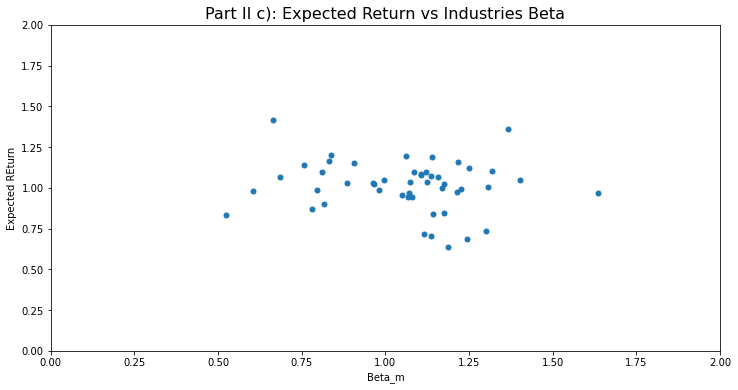

In [5]:
fig=plt.figure(figsize=(12,6))
plt.plot(beta_1, return_1, '.', markersize=10)
plt.xlabel('Beta_m')
plt.ylabel('Expected REturn');
plt.title('Part II c): Expected Return vs Industries Beta', fontsize=16)
plt.xlim(0, 2)
plt.ylim(0, 2)


## d. Is this the shape you would expect to see for this data, given theory (like the CAPM) is true?


This is not the shape we would expect to see. In general, although the data seems to show a weak positive relationship between expected return and $\beta$ in the low $\beta$ portion, we can see that the relationship is quite flat, if not negative. In fact, this observation is particularly strong as $\beta$ increases, i.e. as $\beta$ increases, expected return seems to flatten or even decreases. This is against theory such as CAPM, which states that higher $\beta$ would provide higher expected return (i.e. a strong linear relationship between higher $\beta$ and higher returns).


## e. Plot the security market line you would expect to see in theory (note:  A line can be specified by two points, think of the two points on the SML that you know). 



(0.0, 2.0)

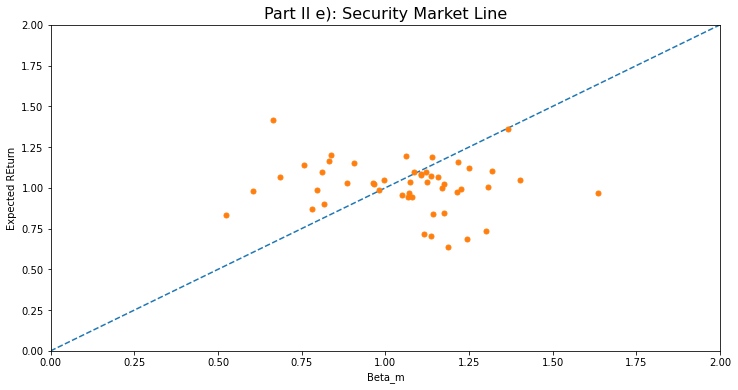

In [6]:
fig=plt.figure(figsize=(12,6))
plt.plot([0, 2], [0, 2], '--')
plt.plot(beta_1, return_1, '.', markersize=10)
plt.xlabel('Beta_m')
plt.ylabel('Expected REturn');
plt.title('Part II e): Security Market Line', fontsize=16)
plt.xlim(0, 2)
plt.ylim(0, 2)

## f. Plot a line of best fit through the data you plotted in c).  How does this line compare with the theoretical line in e)?  What might cause this, and what kind of implications does this have for asset pricing models?



(0.0, 2.0)

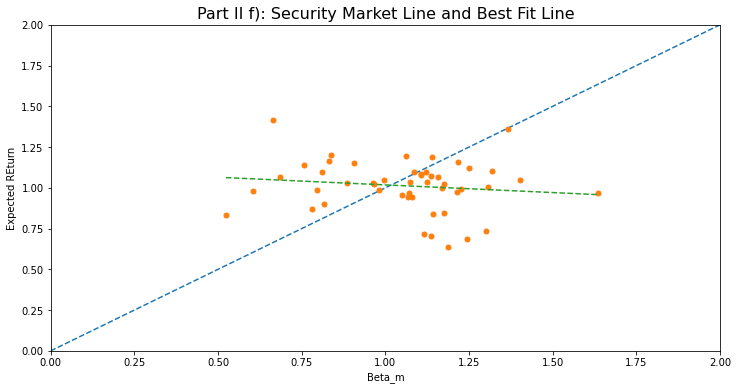

In [7]:
fig=plt.figure(figsize=(12,6))
plt.plot([0, 2], [0, 2], '--')
plt.plot(beta_1, return_1, '.', markersize=10)
plt.plot(np.unique(beta_1), np.poly1d(np.polyfit(beta_1, return_1, 1))(np.unique(beta_1)), '--')
plt.xlabel('Beta_m')
plt.ylabel('Expected REturn');
plt.title('Part II f): Security Market Line and Best Fit Line', fontsize=16)
plt.xlim(0, 2)
plt.ylim(0, 2)

As discussed in part d, we can see that the best fit line has a negative relationship between expected return and $\beta$, which is completely against the theoretical security market line (quality anamoly).

If the investors overwhelmingly adopt asset pricing models such as CAPM, investors would want to invest in higher $\beta$ assets to achieve higher returns. However, that may then drive up the assets' prices and therefore lower their return, which explains for the high $\beta$ low return data. The opposite is also true, where investors avoid low $\beta$ assets and therefore these assets are consistently undervalued in its price but have high returns. The plot shows that asset pricing models such as CAPM may undervalue low $\beta$ assets and overvalue high $\beta$ assets.

## g. What kind of real life constraints might lead to this effect?



Real life constraints that may lead to this flat or even negative relationship between expected return and $\beta$ include borrowing constraints and corresponding leverage level of investors.

## h. How would you take advantage of the findings in the graph if you thought the CAPM was the right model?


To take advantage of the findings, we could simply long low $\beta$ assets and short high $\beta$ assets to achieve high overall return for the portfolios.

In other words, the industries above the SML are undervalued and the industries below the SML are overvalued; we should short the overvalued stocks and long the undervalued stocks. 

# Part III:  Using the BAB factor

## a. Consider a factor model test (with cross sectional regression) of the form:
$$R_{i}=\gamma_{0}+\gamma_{M} \beta_{i m}+\hat{\gamma}_{h m l} \beta_{i, h m l}+\gamma_{U M D} \beta_{i, U M D}+\gamma_{B A B} \beta_{i, B A B}+\eta_{i}$$
where BAB is a “betting-against-beta” portfolio constructed in the style of Fama/French, and the other factors are as created by Fama/French.


## b.	Run a cross-sectional regression test on the 49 portfolios using the above model.  Do so in the style of Fama-MacBeth, where you:
- Estimate β_i for each portfolio, where β_i is a vector of the coefficients on all of the explanatory factors.
- 2nd pass: for each month t_i run a regression of R_i and β_i to compute all of the γ in each given month.
- Now, take the time series you have for γ_i and compute t-stat, standard deviation, standard error, p value, etc. for each factor. 


In [8]:
# Step 1
factors = ff_port[['Mkt-RF', 'HML', 'UMD']]
factors = pd.concat([factors, factor['BAB']], axis=1)
industries_2 = industries[:-2]

beta_m = []
beta_hml = []
beta_umd = []
beta_bab = []

x = sm.add_constant(factors)

for name in industries_2.columns:
  y_temp = industries_1[name] - market['RF']
  mod2 = sm.OLS(y_temp, x, missing = 'drop').fit()
  beta_m.append(mod2.params[1])
  beta_hml.append(mod2.params[2])
  beta_umd.append(mod2.params[3])
  beta_bab.append(mod2.params[4])

In [9]:
# Step 2 and Step 3
d = {'beta_m': beta_m, 'beta_hml': beta_hml, "beta_umd": beta_umd, "beta_bab": beta_bab}
betas = pd.DataFrame(d)
betas.index = industries_2.columns
x = sm.add_constant(betas)
avg_return = pd.DataFrame(industries.mean())

mod3 = sm.OLS(avg_return, x).fit()

## c. 	Report the p-value, t-stat, and estimate for the risk premia γ for each risk factor above. 

In [10]:
print("coefficient->","gamma_0: ",round(mod3.params[0],2), "gamma_market: ",round(mod3.params[1],2),\
      "gamma_hml: ", round(mod3.params[2],2), "gamma_umd: ", round(mod3.params[3],2), "gamma_bab", round(mod3.params[4],2))
print("Standard Error->","gamma_0: ",round(mod3.bse[0],2), "gamma_market: ",round(mod3.bse[1],2),\
      "gamma_hml: ", round(mod3.bse[2],2), "gamma_umd: ", round(mod3.bse[3],2), "gamma_bab", round(mod3.bse[4],2))
print("t-stat->","gamma_0: ",round(mod3.tvalues[0],2), "gamma_market: ",round(mod3.tvalues[1],2),\
      "gamma_hml: ", round(mod3.tvalues[2],2), "gamma_umd: ", round(mod3.tvalues[3],2), "gamma_bab", round(mod3.tvalues[4],2))
print("p-value->","gamma_0: ",round(mod3.pvalues[0],2), "gamma_market: ",round(mod3.pvalues[1],2),\
      "gamma_hml: ", round(mod3.pvalues[2],2), "gamma_umd: ", round(mod3.pvalues[3],2), "gamma_bab", round(mod3.pvalues[4],2))
print("r-squared->", round(mod3.rsquared,2))

coefficient-> gamma_0:  1.1 gamma_market:  -0.07 gamma_hml:  -0.07 gamma_umd:  0.19 gamma_bab 0.0
Standard Error-> gamma_0:  0.17 gamma_market:  0.15 gamma_hml:  0.1 gamma_umd:  0.3 gamma_bab 0.0
t-stat-> gamma_0:  6.69 gamma_market:  -0.47 gamma_hml:  -0.73 gamma_umd:  0.64 gamma_bab 0.14
p-value-> gamma_0:  0.0 gamma_market:  0.64 gamma_hml:  0.47 gamma_umd:  0.53 gamma_bab 0.89
r-squared-> 0.05


## d.	Does exposure to the BAB factor here help explain any of the variation in expected returns?  Does this make sense?



From the above summary statistics, it doesn't seem like the exposure to the BAB factor helps explain the variation in expected return since the p-values for the different $\gamma$ factors are overwhelmingly too high, except for the constant term. This means that the factors aren't statistically significant. This somewhat makes sense since BAB is akin to SMB, and the size factor as shown in previous homework doesn't help explain the expected return.



## e.	Is there anything about the test results that does not sit well with you?  What about the r^2? The coefficient on the market beta?

The r-squared for the regression is also very low, in fact at only 5%, indicating that these factors together can only account for 5% of the expected return, which seems even lower than without BAB. Additionally, the coefficient on the market beta is a negative number, which also seems to be at odd with our intuition since the return should have a positive relationship with the market return.

# Part IV:  Comparing Quality:



## a)	Repeat part III but for the QMJ factor instead of BAB.

In [11]:
# Step 1
factors = ff_port[['Mkt-RF', 'HML', 'UMD']]
factors = pd.concat([factors, factor['QMJ']], axis=1)
industries_2 = industries[:-2]

beta_m = []
beta_hml = []
beta_umd = []
beta_qmj = []

x = sm.add_constant(factors)

for name in industries_2.columns:
  y_temp = industries_1[name] - market['RF']
  mod2 = sm.OLS(y_temp, x, missing = 'drop').fit()
  beta_m.append(mod2.params[1])
  beta_hml.append(mod2.params[2])
  beta_umd.append(mod2.params[3])
  beta_qmj.append(mod2.params[4])

# Step 2 and Step 3
d = {'beta_m': beta_m, 'beta_hml': beta_hml, "beta_umd": beta_umd, "beta_qmj": beta_bab}
betas = pd.DataFrame(d)
betas.index = industries_2.columns
x = sm.add_constant(betas)
avg_return = pd.DataFrame(industries.mean())

mod4 = sm.OLS(avg_return, x).fit()

print("coefficient->","gamma_0: ",round(mod4.params[0],2), "gamma_market: ",round(mod4.params[1],2),\
      "gamma_hml: ", round(mod4.params[2],2), "gamma_umd: ", round(mod4.params[3],2), "gamma_qmj", round(mod4.params[4],2))
print("Standard Error->","gamma_0: ",round(mod4.bse[0],2), "gamma_market: ",round(mod4.bse[1],2),\
      "gamma_hml: ", round(mod4.bse[2],2), "gamma_umd: ", round(mod4.bse[3],2), "gamma_qmj", round(mod4.bse[4],2))
print("t-stat->","gamma_0: ",round(mod4.tvalues[0],2), "gamma_market: ",round(mod4.tvalues[1],2),\
      "gamma_hml: ", round(mod4.tvalues[2],2), "gamma_umd: ", round(mod4.tvalues[3],2), "gamma_qmj", round(mod4.tvalues[4],2))
print("p-value->","gamma_0: ",round(mod4.pvalues[0],2), "gamma_market: ",round(mod4.pvalues[1],2),\
      "gamma_hml: ", round(mod4.pvalues[2],2), "gamma_umd: ", round(mod4.pvalues[3],2), "gamma_qmj", round(mod4.pvalues[4],2))
print("r-squared->", round(mod4.rsquared,2))

coefficient-> gamma_0:  0.93 gamma_market:  0.08 gamma_hml:  -0.09 gamma_umd:  0.1 gamma_qmj 0.0
Standard Error-> gamma_0:  0.18 gamma_market:  0.17 gamma_hml:  0.1 gamma_umd:  0.29 gamma_qmj 0.0
t-stat-> gamma_0:  5.24 gamma_market:  0.51 gamma_hml:  -0.87 gamma_umd:  0.36 gamma_qmj 0.78
p-value-> gamma_0:  0.0 gamma_market:  0.62 gamma_hml:  0.39 gamma_umd:  0.72 gamma_qmj 0.44
r-squared-> 0.03


## b)	Repeat part III but for the RMW factor instead of BAB.

In [12]:
# Step 1
factors = ff_port[['Mkt-RF', 'HML', 'UMD', 'RMW']]
industries_2 = industries[:-2]

beta_m = []
beta_hml = []
beta_umd = []
beta_rmw = []

x = sm.add_constant(factors)

for name in industries_2.columns:
  y_temp = industries_1[name] - market['RF']
  mod2 = sm.OLS(y_temp, x, missing = 'drop').fit()
  beta_m.append(mod2.params[1])
  beta_hml.append(mod2.params[2])
  beta_umd.append(mod2.params[3])
  beta_rmw.append(mod2.params[4])

# Step 2 and Step 3
d = {'beta_m': beta_m, 'beta_hml': beta_hml, "beta_umd": beta_umd, "beta_rmw": beta_bab}
betas = pd.DataFrame(d)
betas.index = industries_2.columns
x = sm.add_constant(betas)
avg_return = pd.DataFrame(industries.mean())

mod5 = sm.OLS(avg_return, x).fit()

print("coefficient->","gamma_0: ",round(mod5.params[0],2), "gamma_market: ",round(mod5.params[1],2),\
      "gamma_hml: ", round(mod5.params[2],2), "gamma_umd: ", round(mod5.params[3],2), "gamma_rmw", round(mod5.params[4],2))
print("Standard Error->","gamma_0: ",round(mod5.bse[0],2), "gamma_market: ",round(mod5.bse[1],2),\
      "gamma_hml: ", round(mod5.bse[2],2), "gamma_umd: ", round(mod5.bse[3],2), "gamma_rmw", round(mod5.bse[4],2))
print("t-stat->","gamma_0: ",round(mod5.tvalues[0],2), "gamma_market: ",round(mod5.tvalues[1],2),\
      "gamma_hml: ", round(mod5.tvalues[2],2), "gamma_umd: ", round(mod5.tvalues[3],2), "gamma_rmw", round(mod5.tvalues[4],2))
print("p-value->","gamma_0: ",round(mod5.pvalues[0],2), "gamma_market: ",round(mod5.pvalues[1],2),\
      "gamma_hml: ", round(mod5.pvalues[2],2), "gamma_umd: ", round(mod5.pvalues[3],2), "gamma_rmw", round(mod5.pvalues[4],2))
print("r-squared->", round(mod5.rsquared,2))

coefficient-> gamma_0:  1.06 gamma_market:  -0.04 gamma_hml:  -0.09 gamma_umd:  0.11 gamma_rmw 0.0
Standard Error-> gamma_0:  0.17 gamma_market:  0.15 gamma_hml:  0.1 gamma_umd:  0.29 gamma_rmw 0.0
t-stat-> gamma_0:  6.43 gamma_market:  -0.24 gamma_hml:  -0.97 gamma_umd:  0.36 gamma_rmw 0.48
p-value-> gamma_0:  0.0 gamma_market:  0.81 gamma_hml:  0.34 gamma_umd:  0.72 gamma_rmw 0.64
r-squared-> 0.04



## c)	How do your results for the QMJ factor affect your beliefs about the BAB factor?



The results for QMJ certainly provides a perspective in evaluating the BAB factor, since the BAB factor, while not great in its predictive power, seem slightly better than QMJ.


## d)	Which do you think is a better measure of quality? Why?  Are they picking up the same effects?



Comparing QMJ to BAB, it is still hard to conclude which factor is the better factor. For one, the r-squared for BAB is higher than that of QMJ, meaning that by including BAB the regression can better explain the return. For the other, the coefficient for the market when we include QMJ in the regression provides a positive number, which agrees with our intuition where the return should be positively correlated to the market.

## e)	Which do you think goes a longer way in explaining the cross section of expected returns? 

We believe QMJ might go a longer way in explaining the cross section of expected returns. This is because, while the r-squared is slightly lower than BAB, the p-value is lower than that of BAB, providing a slightly statistically significant measure.

# Part V:  Concluding:

## 1.	Can you come up with one test that you would like to see performed that might shed some more light on this “quality” anomaly?  Suggest any test and describe how you would go about performing it, but DO NOT do any analysis (unless, of course you really want to and then I’ll be impressed!).

Perhaps from a behavioral standpoint there may be some explanation as to why investors overvalue stocks with high $\beta$ and undervalue stocks with low $\beta$. Intuitively, this may be more true for investors with more stringent requirements (be it regulatory or not) in terms of consistency, such as pension funds and school endowments, compared to less risk averse investors such as hedge fund managers.

As such, one may obtain data from these two sides of the investment commnity to confirm or negate this hypothesis. 